In [48]:
try:
    import cirq, cirq_ionq as ionq
except (ImportError, AssertionError):
    %pip install cirq
    import cirq, cirq_ionq as ionq

try:
    from matplotlib import pyplot as plt
except (ImportError):
    %pip install matplotlib
    from matplotlib import pyplot as plt

try:
    from qiskit_ionq import IonQProvider
except ImportError:
    %pip install qiskit-ionq
    from qiskit_ionq import IonQProvider 

import math
from math import pi
import random
import numpy as np
from scipy.optimize import minimize
from cirq.contrib.svg import SVGCircuit as draw


f = open("C:\\Users\\fouad\\Documents\\tokens.txt", "r")
next = f.readline()
next = f.readline()
# Put your own token here if you would like to run it
TOKEN_IONQ = next[:len(next)-1]
service = ionq.Service(api_key=TOKEN_IONQ, default_target='simulator')



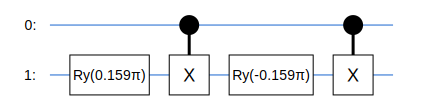

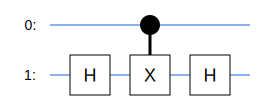

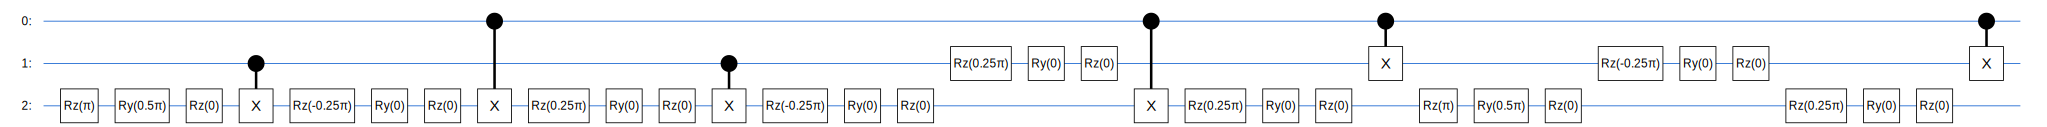

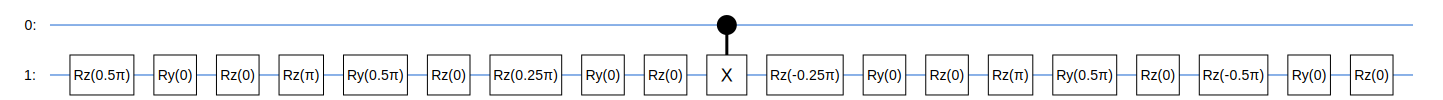

In [49]:

def u(q0, theta, phi, lamb):
    circ.append(cirq.Moment(cirq.rz(lamb)(q0)))
    circ.append(cirq.Moment(cirq.ry(theta)(q0)))
    circ.append(cirq.Moment(cirq.rz(phi)(q0)))
    
def cz(q0, q1):
    circ.append(cirq.Moment(cirq.H(q1)))
    circ.append(cirq.Moment(cirq.CNOT(q0, q1)))
    circ.append(cirq.Moment(cirq.H(q1)))

def cry(theta, q0, q1):
    circ.append(cirq.ry(theta/2)(q1))
    circ.append(cirq.CNOT(q0, q1))
    circ.append(cirq.ry(-theta/2)(q1))
    circ.append(cirq.CNOT(q0, q1))

def ccx(q0, q1, q2):
    u(q2, pi/2, 0, pi)
    circ.append(cirq.Moment(cirq.CNOT(q1, q2)))
    u(q2, 0, 0, -pi/4)
    circ.append(cirq.Moment(cirq.CNOT(q0, q2)))
    u(q2, 0, 0, pi/4)
    circ.append(cirq.Moment(cirq.CNOT(q1, q2)))
    u(q2, 0, 0, -pi/4)
    u(q1, 0, 0, pi/4)
    circ.append(cirq.Moment(cirq.CNOT(q0, q2)))
    u(q2, 0, 0, pi/4)
    circ.append(cirq.Moment(cirq.CNOT(q0, q1)))
    u(q2, pi/2, 0, pi)
    u(q1, 0, 0, -pi/4)
    u(q2, 0, 0, pi/4)
    circ.append(cirq.Moment(cirq.CNOT(q0, q1)))
    
def ch(q0, q1):
    u(q1, 0, 0, pi/2)
    u(q1, pi/2, 0, pi)
    u(q1, 0, 0, pi/4)
    circ.append(cirq.Moment(cirq.CNOT(q0, q1)))
    u(q1, 0, 0, -pi/4)
    u(q1, pi/2, 0, pi)
    u(q1, 0, 0, -pi/2)

circ = cirq.Circuit()
circ_qubits = [cirq.LineQubit(x) for x in range(2)]
cry(1,circ_qubits[0], circ_qubits[1])
display(draw(circ))

circ = cirq.Circuit()
circ_qubits = [cirq.LineQubit(x) for x in range(2)]
cz(circ_qubits[0], circ_qubits[1])
display(draw(circ))

circ = cirq.Circuit()
circ_qubits = [cirq.LineQubit(x) for x in range(3)]
ccx(circ_qubits[0], circ_qubits[1], circ_qubits[2])
display(draw(circ))

circ = cirq.Circuit()
circ_qubits = [cirq.LineQubit(x) for x in range(2)]
ch(circ_qubits[0], circ_qubits[1])
display(draw(circ))




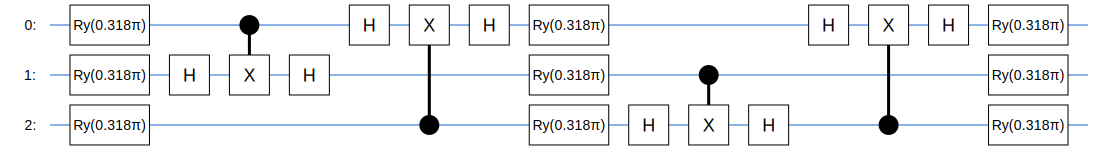

In [50]:
def apply_fixed_ansatz(qubits, parameters):
    
    circ.append(cirq.Moment([cirq.ry(parameters[0][iz])(qubits[iz]) for iz in range(0, len(qubits))]))

    cz(qubits[0], qubits[1])
    cz(qubits[2], qubits[0])

    circ.append(cirq.Moment([cirq.ry(parameters[1][iz])(qubits[iz]) for iz in range(0, len(qubits))]))
        
    cz(qubits[1], qubits[2])
    cz(qubits[2], qubits[0])

    circ.append(cirq.Moment([cirq.ry(parameters[2][iz])(qubits[iz]) for iz in range(0, len(qubits))]))


circ = cirq.Circuit()
circ_qubits = [cirq.LineQubit(x) for x in range(3)]
apply_fixed_ansatz(circ_qubits, [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ])
draw(circ)

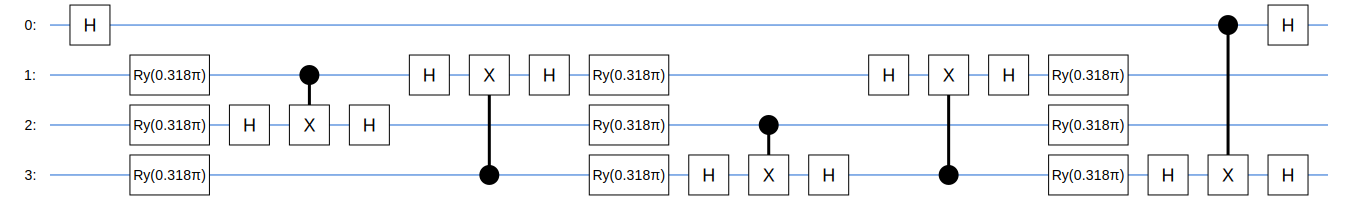

In [51]:
def had_test(gate_type, qubits, auxiliary_index, parameters):

    circ.append(cirq.H(auxiliary_index))

    apply_fixed_ansatz(qubits, parameters)

    for ie in range (0, len(gate_type[0])):
        if (gate_type[0][ie] == 1):
            cz(auxiliary_index, qubits[ie])

    for ie in range (0, len(gate_type[1])):
        if (gate_type[1][ie] == 1):
            cz(auxiliary_index,qubits[ie])

    circ.append(cirq.H(auxiliary_index))

circ = cirq.Circuit()
circ_qubits = [cirq.LineQubit(x) for x in range(4)]
had_test([[0, 0, 0], [0, 0, 1]], circ_qubits[1:], circ_qubits[0], [[1, 1, 1], [1, 1, 1], [1, 1, 1]])

draw(circ)

In [52]:
def control_fixed_ansatz(qubits, parameters, auxiliary):

    for i in range (0, len(qubits)):
        cry(parameters[0][i], auxiliary, qubits[i])

    ccx(auxiliary, qubits[1], cirq.LineQubit(4))
    cz(qubits[0], cirq.LineQubit(4))
    ccx(auxiliary, qubits[1], cirq.LineQubit(4))

    ccx(auxiliary, qubits[0], cirq.LineQubit(4))
    cz(qubits[2], cirq.LineQubit(4))
    ccx(auxiliary, qubits[0], cirq.LineQubit(4))

    for i in range (0, len(qubits)):
        cry(parameters[1][i], auxiliary, qubits[i])
    
    ccx(auxiliary, qubits[2], cirq.LineQubit(4))
    cz(qubits[1], cirq.LineQubit(4))
    ccx(auxiliary, qubits[2], cirq.LineQubit(4))

    ccx(auxiliary, qubits[0], cirq.LineQubit(4))
    cz(qubits[2], cirq.LineQubit(4))
    ccx(auxiliary, qubits[0], cirq.LineQubit(4))
    
    for i in range (0, len(qubits)):
        cry(parameters[2][i], auxiliary, qubits[i])
    
circ = cirq.Circuit()
circ_qubits = [cirq.LineQubit(x) for x in range(5)]
control_fixed_ansatz(circ_qubits[1:4], [[1, 1, 1], [1, 1, 1], [1, 1, 1]], circ_qubits[0])
draw(circ)

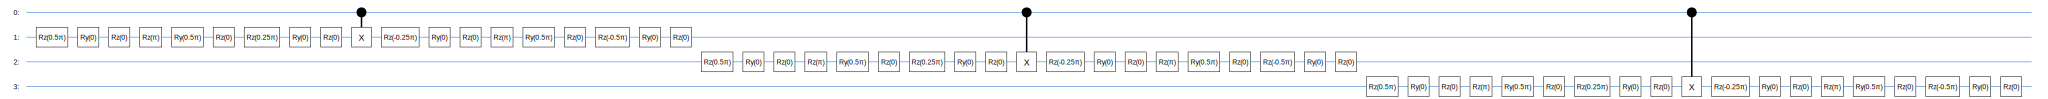

In [53]:
def control_b(auxiliary, qubits):

    for ia in range (0, len(qubits)):
        ch(auxiliary, qubits[ia])

circ = cirq.Circuit()
circ_qubits = [cirq.LineQubit(x) for x in range(4)]
control_b(circ_qubits[0], circ_qubits[1:4])
draw(circ)


dict_keys([(1, 0, 1, 1, 0), (1, 1, 0, 1, 0), (0, 0, 0, 0, 0), (1, 1, 0, 0, 0), (0, 0, 1, 1, 0), (1, 0, 0, 0, 0), (0, 1, 1, 1, 0), (1, 1, 1, 1, 0), (0, 1, 0, 0, 0), (0, 1, 0, 1, 0), (1, 0, 1, 0, 0), (0, 1, 1, 0, 0), (1, 1, 1, 0, 0)])
dict_values([7, 5, 45, 8, 6, 11, 4, 6, 2, 3, 1, 1, 1])


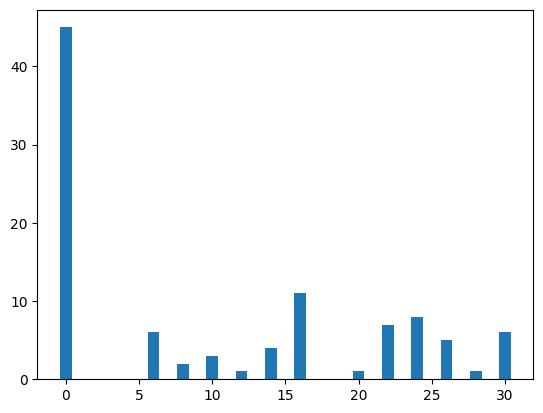

In [54]:
def special_had_test(gate_type, qubits, auxiliary_index, parameters):

    circ.append(cirq.H(auxiliary_index))

    control_fixed_ansatz(qubits, parameters, auxiliary_index)

    for ty in range (0, len(gate_type)):
        if (gate_type[ty] == 1):
            cz(auxiliary_index, qubits[ty])

    control_b(auxiliary_index, qubits)

    circ.append(cirq.H(auxiliary_index))

circ = cirq.Circuit()
circ_qubits = [cirq.LineQubit(x) for x in range(5)]
special_had_test([[0, 0, 0], [0, 0, 1]], circ_qubits[1:4], circ_qubits[0], [[1, 1, 1], [1, 1, 1], [1, 1, 1]])


# ------------ TESTING BELOW ------------------
measure([0,1,2,3,4])
display(draw(circ))
result = service.run(circ, repetitions=100)
outputstate = result.multi_measurement_histogram(keys=['q0', 'q1', 'q2', 'q3', 'q4'])
print(outputstate.keys())
keys = list(map(lambda h: h[4]*1 + h[3]*2 + h[2]*4 + h[1]*8 + h[0]*16, outputstate.keys()))
print(outputstate.values())
from matplotlib import pyplot as plt
plt.bar(keys, outputstate.values())
plt.show()


In [60]:
def measure(q):
    for i in q:
        circ.append(cirq.measure(circ_qubits[i], key='q'+str(i)))

SHOTS = 100

def calculate_cost_function(parameters):

    global clear_output, current_cost

    overall_sum_1 = 0

    parameters = [parameters[0:3], parameters[3:6], parameters[6:9]]

    for i in range(0, len(gate_set)):
        for j in range(0, len(gate_set)):

            global circ

            circ = cirq.Circuit()
            circ_qubits = [cirq.LineQubit(x) for x in range(5)]

            multiply = coefficient_set[i]*coefficient_set[j]

            had_test([gate_set[i], gate_set[j]], circ_qubits[1:4], circ_qubits[0], parameters)

            measure([0])

            result = service.run(circ, repetitions=SHOTS)
            
            outputstate = result.multi_measurement_histogram(keys=['q0'])

            if ((1) in outputstate.keys()):
                m_sum = float(outputstate[(1)])/SHOTS
            else:
                m_sum = 0

            overall_sum_1 += multiply*(1-2*m_sum)

    overall_sum_2 = 0

    for i in range(0, len(gate_set)):
        for j in range(0, len(gate_set)):

            multiply = coefficient_set[i]*coefficient_set[j]
            mult = 1

            for extra in range(0,2):

                circ = cirq.Circuit()
                circ_qubits = [cirq.LineQubit(x) for x in range(5)]

                if (extra == 0):
                    special_had_test(gate_set[i], circ_qubits[1:4], circ_qubits[0], parameters)
                else:
                    special_had_test(gate_set[j], circ_qubits[1:4], circ_qubits[0], parameters)

                measure([0])

                result = service.run(circ, repetitions=SHOTS)

                outputstate = result.multi_measurement_histogram(keys=['q0'])

                if ((1) in outputstate.keys()):
                    m_sum = float(outputstate[(1)])/SHOTS
                else:
                    m_sum = 0

                mult = mult*(1-2*m_sum)

            overall_sum_2 += multiply*mult

    current_cost = 1-float(overall_sum_2/overall_sum_1)
    print(current_cost)
    return current_cost


In [61]:
def log_cost(x):
    cost_values.append(current_cost)

def retrieve_statevector(output):
    res = []
    for a0 in range(2):
      for a1 in range(2):
         for a2 in range(2):
            for a3 in range(2):
               for a4 in range(2):
                if (a0, a1, a2, a3, a4) in output.keys():
                   res += [output[(a0, a1, a2, a3, a4)]]
                else:
                   res += [0]
    return res

k = [float(random.randint(0,3000))/1000 for i in range(0, 9)]

optimizers = ["COBYLA", "SLSQP", "CG", "BFGS", "L-BFGS-B"]

coefficient_set = [0.55, 0.225, 0.225]
gate_set = [[0, 0, 0], [0, 1, 0], [0, 0, 1]]

cost_sum = np.zeros((len(optimizers), 201))
accuracy = []

for i in range(len(optimizers)):
  cost_values = []
  out = minimize(calculate_cost_function, x0=k, method=optimizers[i], options={'maxiter':200}, callback=log_cost)
  print(out)

  proper_index = 0
  for element in np.array(cost_values):
      cost_sum[i][proper_index] += element
      proper_index += 1

  out_f = [out['x'][0:3], out['x'][3:6], out['x'][6:9]]

  print(out_f)

  circ = cirq.Circuit()
  circ_qubits = [cirq.LineQubit(x) for x in range(5)]

  outputstate = result.multi_measurement_histogram(keys=['q0', 'q1', 'q2', 'q3', 'q4'])
  o = retrieve_statevector(outputstate)

  a1 = coefficient_set[2]*np.array([[1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,-1,0,0,0], [0,0,0,0,0,-1,0,0], [0,0,0,0,0,0,-1,0], [0,0,0,0,0,0,0,-1]])
  a0 = coefficient_set[1]*np.array([[1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,-1,0,0,0,0,0], [0,0,0,-1,0,0,0,0], [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,-1,0], [0,0,0,0,0,0,0,-1]])
  a2 = coefficient_set[0]*np.array([[1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,0,1]])

  a3 = np.add(np.add(a2, a0), a1)

  b = np.array([float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8))])

  acc = (b.dot(a3.dot(o)/(np.linalg.norm(a3.dot(o)))))**2
  print(acc)
  accuracy += [acc]

0.0
0.0
0.0
0.0
0.0
0.0


KeyboardInterrupt: 